Task (b)
Benchmark result: size: 1x1, time: 0.006067037582397461
Benchmark result: size: 101x101, time: 0.047756195068359375
Benchmark result: size: 201x201, time: 0.3163301944732666
Benchmark result: size: 301x301, time: 1.1590640544891357
Benchmark result: size: 401x401, time: 2.812016248703003
Benchmark result: size: 501x501, time: 5.709399938583374
Benchmark result: size: 601x601, time: 9.965286016464233
Benchmark result: size: 701x701, time: 15.760380744934082
Benchmark result: size: 801x801, time: 24.21047878265381
Benchmark result: size: 901x901, time: 34.18920397758484
task (c)


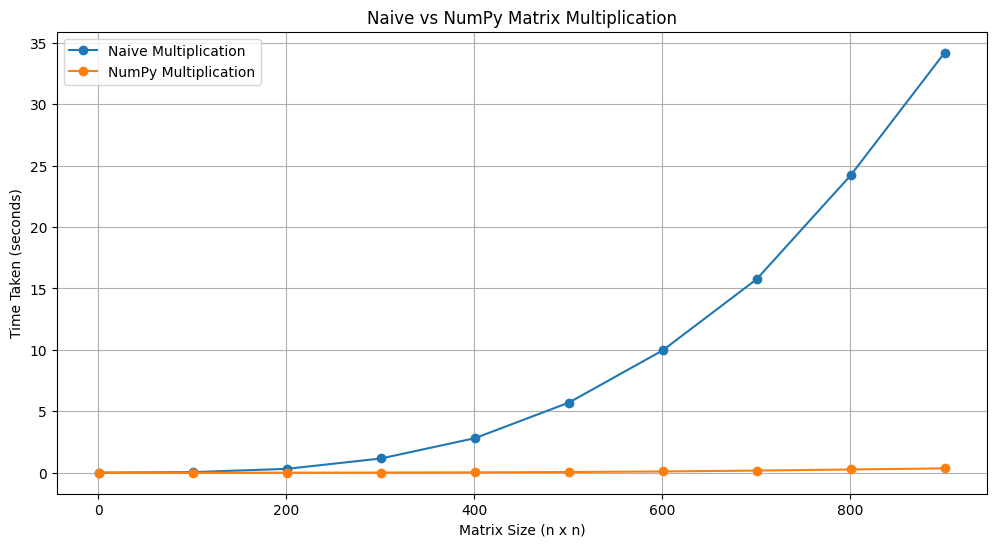

Task (d): Explanation of Time Complexity
The naive approach has a time complexity of O(n^3) due to the three nested loops. This isnt that great for larger 
matrices, because it takes a lot of time. NumPy uses highly optimized libraries which results in lower time  
complexity due to optimizations.


In [3]:
# Import required libraries
import random
import numpy as np
import time
import matplotlib.pyplot as plt

#create matrix sizes up to 1000 with a preferred step
matrix_sizes = list(range(1, 1001, 100))  

#function to create matrices of size nxn with integer
def generate_random_matrix(n):
    return [[random.randint(1, 10) for i in range(n)] for i in range(n)]

# Task (a): Implement the standard matrix multiplication algorithm without NumPy
def naive_matrix_multiplication(A, B):
    n = len(A)
    result = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    return result

# Task (b): Benchmark the runtime of the naive algorithm for each matrix size
naive_times = []
print('Task (b)')
for n in matrix_sizes:
    #generate random matrices of size n x n
    A = generate_random_matrix(n)
    B = generate_random_matrix(n)
    
    # Time naive multiplication
    start = time.time()
    naive_result = naive_matrix_multiplication(A, B)
    naive_times.append(time.time() - start)
    print(f'Benchmark result: size: {n}x{n}, time: {time.time() - start}')



# Task (c): Compare with NumPy's matrix multiplication and plot the time complexity
numpy_times = []

for n in matrix_sizes:
    #generate random matrices of size n x n
    A = generate_random_matrix(n)
    B = generate_random_matrix(n)
    
    #time numpy multiplication
    start = time.time()
    numpy_result = np.dot(A, B)
    numpy_times.append(time.time() - start)



#plot
print('task (c)')
plt.figure(figsize=(12, 6))
plt.plot(matrix_sizes, naive_times, label="Naive Multiplication", marker='o')
plt.plot(matrix_sizes, numpy_times, label="NumPy Multiplication", marker='o')
plt.xlabel("Matrix Size (n x n)")
plt.ylabel("Time Taken (seconds)")
plt.title("Naive vs NumPy Matrix Multiplication")
plt.legend()
plt.grid(True)
plt.show()

print('''Task (d): Explanation of Time Complexity
The naive approach has a time complexity of O(n^3) due to the three nested loops. This isnt that great for larger 
matrices, because it takes a lot of time. NumPy uses highly optimized libraries which results in lower time  
complexity due to optimizations.''')




In [8]:
import numpy as np
import time

# naive
def naive_matrix_multiplication(A, B):
    n = len(A)
    result = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    return result

# strassens algorithm without recursion 
def strassen_normal(A, B):
    # extract elements for easy reference
    a, b, c, d = A[0][0], A[0][1], A[1][0], A[1][1]
    e, f, g, h = B[0][0], B[0][1], B[1][0], B[1][1]

    #calculate the seven products
    M1 = (a + d) * (e + h)
    M2 = (c + d) * e
    M3 = a * (f - h)
    M4 = d * (g - e)
    M5 = (a + b) * h
    M6 = (c - a) * (e + f)
    M7 = (b - d) * (g + h)

    # calculate the resulting matrix quadrants
    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    #return the resulting matrix
    return [[C11, C12], [C21, C22]]

# recursive strassenss algorithm 
def strassen_recursive(A, B):
    if len(A) == 1:  #base case for 1x1 matrix
        return [[A[0][0] * B[0][0]]]
    
    # extract elements for easy reference
    a, b, c, d = A[0][0], A[0][1], A[1][0], A[1][1]
    e, f, g, h = B[0][0], B[0][1], B[1][0], B[1][1]

    # calculate the seven products using recursion
    M1 = strassen_recursive([[a + d]], [[e + h]])
    M2 = strassen_recursive([[c + d]], [[e]])
    M3 = strassen_recursive([[a]], [[f - h]])
    M4 = strassen_recursive([[d]], [[g - e]])
    M5 = strassen_recursive([[a + b]], [[h]])
    M6 = strassen_recursive([[c - a]], [[e + f]])
    M7 = strassen_recursive([[b - d]], [[g + h]])

    # calculate the resulting matrix quadrants
    C11 = M1[0][0] + M4[0][0] - M5[0][0] + M7[0][0]
    C12 = M3[0][0] + M5[0][0]
    C21 = M2[0][0] + M4[0][0]
    C22 = M1[0][0] - M2[0][0] + M3[0][0] + M6[0][0]

    return [[C11, C12], [C21, C22]]

#example 2x2 matrices
A = [[1, 2], [3, 4]]
B = [[5, 6], [7, 8]]

#naive matrix multiplication timing
start_time = time.time()
result_naive = naive_matrix_multiplication(A, B)
naive_time = time.time() - start_time

#strassens algorithm without recursion timing
start_time = time.time()
result_strassen_no_recursion = strassen_normal(A, B)
strassen_no_recursion_time = time.time() - start_time

#strassens algorithm with recursion timing
start_time = time.time()
result_strassen_recursive = strassen_recursive(A, B)
strassen_recursive_time = time.time() - start_time

# numpys matrix multiplication timing
start_time = time.time()
result_numpy = np.dot(A, B)
numpy_time = time.time() - start_time

#print results and performance
print('task (e)')
print("Naive Multiplication Result:")
print(f"Time: {naive_time:.6f} seconds\n")

print("Strassen (No Recursion) Result:")
print(f"Time: {strassen_no_recursion_time:.6f} seconds\n")

print("Strassen (Recursive) Result:")
print(f"Time: {strassen_recursive_time:.6f} seconds\n")

print("NumPy Multiplication Result:")
print(f"Time: {numpy_time:.6f} seconds\n")
print("""Strassens non-recursive method is the fastest, followed closely by the recursive version.
Naive multiplication also performs efficiently, coming in slightly slower than Strassens methods.
NumPy is way faster for bigger matrix sizes.""")

task (e)
Naive Multiplication Result:
Time: 0.000040 seconds

Strassen (No Recursion) Result:
Time: 0.000031 seconds

Strassen (Recursive) Result:
Time: 0.000034 seconds

NumPy Multiplication Result:
Time: 0.000054 seconds

Strassens non-recursive method is the fastest, followed closely by the recursive version.
Naive multiplication also performs efficiently, coming in slightly slower than Strassens methods.
NumPy is way faster for bigger matrix sizes.
